In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Additional Imports here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results meana nd the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
509,8,120,78,0,0,25.0,0.409,64,0
606,1,181,78,42,293,40.0,1.258,22,1
31,3,158,76,36,245,31.6,0.851,28,1


In [29]:
# Step 1
X_train, X_test, y_train, y_test = train_test_split(
                                                    df.drop("Outcome", axis=1), 
                                                    df["Outcome"], 
                                                    stratify=df["Outcome"]
                                                    )

In [30]:
# Step 2

# Varies depending on student answer

In [31]:
# Step 3
print("Model Baseline (Class 0)")
y_train.value_counts(normalize=True)[0]

Model Baseline (Class 0)


0.6510416666666666

In [32]:
# Step 4
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [33]:
# Step 5
lr = LogisticRegression()
lr.fit(X_train_std,y_train)

print("Accuracy Score")
lr.score(X_test_std, y_test)

Accuracy Score


0.7916666666666666

In [34]:
# Step 6
print(f"Model Baseline: {y_train.value_counts(normalize=True)[0]}")
print(f"Logistic Regression: {lr.score(X_test_std, y_test)}")
print(f"Improvement over Baseline: {(lr.score(X_test_std, y_test))-(y_train.value_counts(normalize=True)[0])}")

Model Baseline: 0.6510416666666666
Logistic Regression: 0.7916666666666666
Improvement over Baseline: 0.140625


In [45]:
# Step 7
pca = PCA()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Step 8
lr2 = LogisticRegression()
lr2.fit(X_train_pca, y_train)
lr2.score(X_test_pca, y_test) # We expect to see the same score as previous if using all principal components

0.7916666666666666

In [ ]:
# Step 9

# Varies depending on student answer

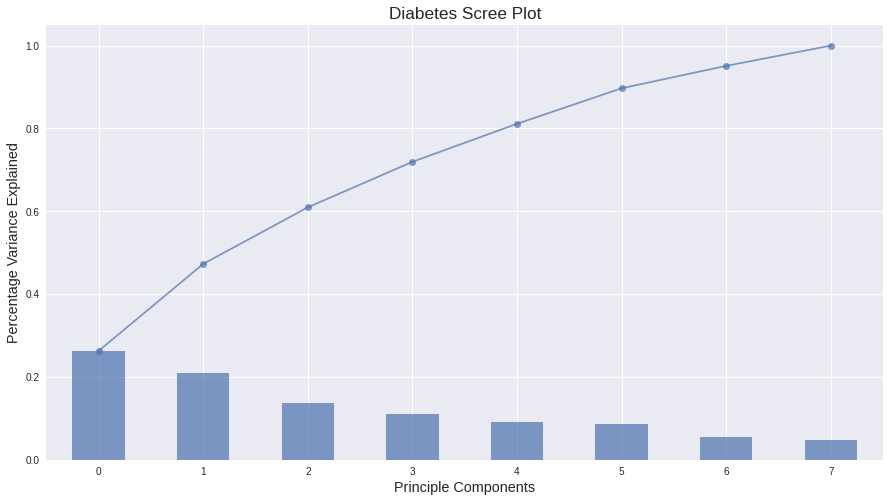

In [105]:
# ✨BONUS✨

plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();